# Project 2 - creating neural net from scratch

The objective of this project is to design a mini “deep learning framework” using only pytorch’s tensor operations and the standard math library, hence in particular without using autograd or the neural-network modules.

Your framework should import only `torch.FloatTensor` and `torch.LongTensor` from pytorch, and use no pre-existing neural-network python toolbox.


-------------
# /////////////TODO/////////////

- start on the report
- create plot of decisionline with model and data as input (for better debugging and insight)
- create Relu()-module
- create proper MSEloss()-module
- create train_model() or similar
- create split_dataset() or similar
- create the net they request

-------------------------------------
-------------------------------------

In [1]:
# Definitely allowed imports
import math
import torch
from torch import FloatTensor, LongTensor, Tensor
# additional imports
import matplotlib
import matplotlib.pyplot as plt


# our own written code
import helpers as HL

# To plot, delete before handin
import numpy as np

# jupyter magic
%load_ext autoreload
%autoreload 2

In [2]:
matplotlib.__version__

'2.1.2'

## Generate datasets

__Generate linear data__

torch.Size([1000, 2]) torch.Size([1000, 1])


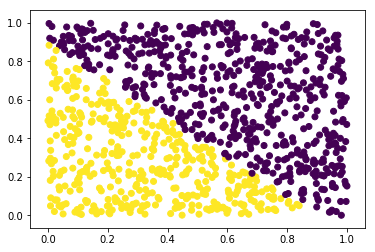

In [3]:
linear_inputs, linear_targets = HL.generate_linear_data()
print(linear_inputs.shape, linear_targets.shape)

# plot the data
plt.scatter(linear_inputs[:,0], linear_inputs[:,1], c=np.squeeze(linear_targets.numpy()))
plt.show()

__Generate a training and a test set of 1,000 points sampled uniformly in [0,1]2, each with a
label 0 if outside the disk of radius 1/ 2π and 1 inside__

torch.Size([1000, 2]) torch.Size([1000, 1])


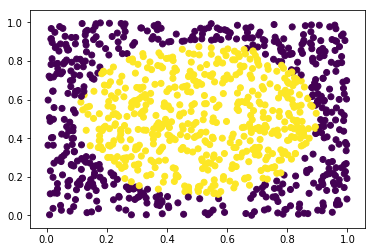

In [4]:
inputs, targets = HL.generate_disc_data(n=1000)
print(inputs.shape, targets.shape)

# plot the data
plt.scatter(inputs[:,0].numpy(), inputs[:,1].numpy(), c=np.squeeze(targets.numpy()))
plt.show()

## Build a network
...with `2` input units, `2` output units, `3` hidden layers of `25` units

Some modules may requires additional methods, and some modules may keep track of information
from the forward pass to be used in the backward.
You should implement at least the modules: `Linear` (fully connected layer), `ReLU` , `Tanh` , `Sequential`  to combine several modules in basic sequential structure, and LossMSE to compute the MSE loss.

## Split dataset

In [5]:
# comment out if you want non-linear dataset:
#inputs, targets = linear_inputs, linear_targets

# split the dataset into train and and test data
train_inputs, train_targets, test_inputs, test_targets = HL.split_dataset(inputs, targets, train_perc=0.7)
print(train_inputs.size(), train_targets.size(), test_inputs.size(), test_targets.size())

torch.Size([700, 2]) torch.Size([700, 1]) torch.Size([300, 2]) torch.Size([300, 1])


In [6]:
mu , std = train_inputs.mean() , train_inputs.std()
train_inputs.sub_( mu ).div_( std )
test_inputs.sub_( mu ).div_( std )


 1.3958  0.3094
-0.4742 -0.2148
 1.3047  1.5623
-0.2581 -1.0912
 0.2675  0.9897
-1.2196  1.7096
-1.1157 -1.2566
-0.7789 -1.3168
 0.3919 -0.3121
 0.6584 -0.2104
 0.1644 -1.4004
-0.6154  0.9036
 1.6063  1.3862
 1.2222  1.4046
-1.3846 -1.1250
 0.6309  0.1189
-0.3420  0.1359
-0.6327  0.3507
-0.8847 -0.1543
 0.7950  0.9414
 0.1337  1.7109
-0.1466 -0.3561
 1.4039  1.6824
 1.6810  0.6402
-1.0449 -0.7390
-1.7217 -0.5152
 0.9021  1.4010
 1.3609 -0.3019
-0.0723  0.6749
-0.0489  0.6594
-0.5582 -0.3097
-1.4747 -0.6272
-0.3742  0.1824
 0.2905 -1.7459
 1.5676 -1.0262
 1.5346 -0.1507
-1.3560 -0.7984
 0.0952 -0.9707
-0.0740 -0.1409
 1.6646 -0.9274
-0.5026 -1.6071
-0.6306 -1.4841
 1.3850 -1.7050
-0.7077  0.5392
 1.3201  0.5414
-0.2777 -1.0824
 1.2396  1.6736
 1.6198 -1.5246
-1.1934 -0.5573
-0.9245  1.7145
-0.8052 -1.1841
-0.6306 -0.2417
-1.4987 -0.5018
-1.7572 -1.4051
 0.3763 -0.9406
 1.4081  1.0925
 1.7248  0.6676
-1.7201 -0.0405
 1.0812  0.8271
-0.4374 -0.5498
-1.6266 -1.7062
-0.9611  0.4545
 1.2558

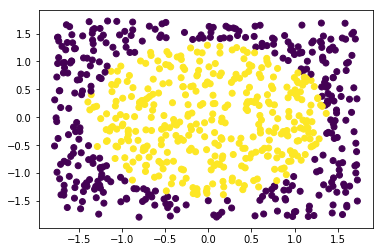

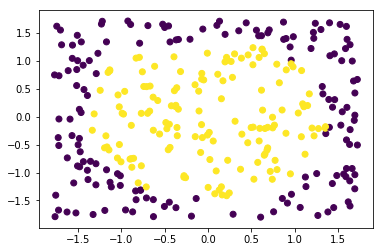

In [7]:
# plot the data
plt.scatter(train_inputs[:,0].numpy(), train_inputs[:,1].numpy(), c=np.squeeze(train_targets.numpy()))
plt.show()

plt.scatter(test_inputs[:,0].numpy(), test_inputs[:,1].numpy(), c=np.squeeze(test_targets.numpy()))
plt.show()

## Test the training Linear Regression

## Run with Sequential

In [32]:
input_dim = 2
hidden_width = 25
output_dim = 2

### Linear
#model = HL.Sequential([HL.Linear(input_dim, output_dim)])


### Linear + Tanh
#model = HL.Sequential([HL.Linear(input_dim, output_dim), HL.Tanh()])


### Linear + Tanh + Linear + Tanh
#model = HL.Sequential([HL.Linear(input_dim, hidden_width), HL.Tanh(), HL.Linear(hidden_width, output_dim), HL.Tanh()])

### Linear + Tanh + Linear
#model = HL.Sequential([HL.Linear(input_dim, hidden_width), HL.Tanh(), HL.Linear(hidden_width, output_dim)])

### Linear + Relu + Linear
#model = HL.Sequential([HL.Linear(input_dim, hidden_width), HL.ReLu(), HL.Linear(hidden_width, output_dim)])


### Linear + Relu + Linear + Tanh
model = HL.Sequential([HL.Linear(input_dim, hidden_width), HL.ReLu(), HL.Linear(hidden_width, output_dim), HL.Tanh()])

[<helpers.Linear object at 0x7f2c602161d0>, <helpers.ReLu object at 0x7f2c602162b0>, <helpers.Linear object at 0x7f2c60216d68>, <helpers.Tanh object at 0x7f2c60216cc0>]
module
module
module
module


__tanh:__   
fill_(-1) in convert_to_one_hot_labels()    
lr = 0.001


In [33]:
model, train_error_list, test_error_list = HL.train_model(train_inputs, train_targets, test_inputs, test_targets, 
                                                    model, learning_rate = 0.001, epochs=500)

0 acc_train_loss 2475.79 acc_train_error 51.14% test_error 48.33%
25 acc_train_loss 147.68 acc_train_error 1.57% test_error 4.33%
50 acc_train_loss 111.28 acc_train_error 1.29% test_error 3.33%
75 acc_train_loss 94.30 acc_train_error 1.29% test_error 3.33%
100 acc_train_loss 82.54 acc_train_error 1.14% test_error 3.33%
125 acc_train_loss 72.47 acc_train_error 1.00% test_error 3.33%
150 acc_train_loss 65.33 acc_train_error 1.00% test_error 3.33%
175 acc_train_loss 59.92 acc_train_error 0.86% test_error 3.33%
200 acc_train_loss 55.61 acc_train_error 0.71% test_error 3.67%
225 acc_train_loss 52.17 acc_train_error 0.71% test_error 3.67%
250 acc_train_loss 49.10 acc_train_error 0.57% test_error 3.67%
275 acc_train_loss 46.50 acc_train_error 0.43% test_error 3.33%
300 acc_train_loss 44.30 acc_train_error 0.43% test_error 3.33%
325 acc_train_loss 42.08 acc_train_error 0.43% test_error 3.67%
350 acc_train_loss 40.20 acc_train_error 0.43% test_error 3.67%
375 acc_train_loss 38.48 acc_train_erro

### Plot with seaborn

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Linear + Relu + Linear

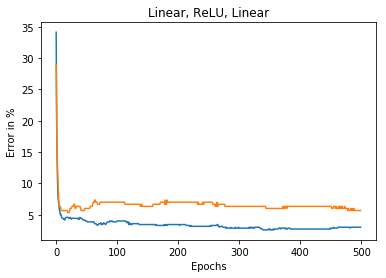

In [24]:
# learning_rate = 0.001
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('Linear, ReLU, Linear')
plt.plot(train_error_list)
plt.plot(test_error_list)
ax.set_xlabel('Epochs')
ax.set_ylabel('Error in %')
plt.show()

In [25]:
plt.savefig('LinearReluLinear.png')

#### Linear + Tanh + Linear

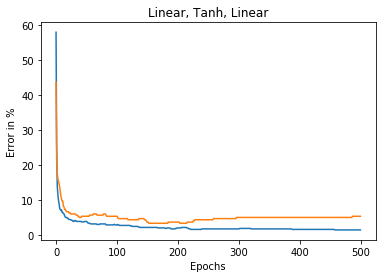

In [30]:
# learning_rate = 0.001
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('Linear, Tanh, Linear')
plt.plot(train_error_list)
plt.plot(test_error_list)
ax.set_xlabel('Epochs')
ax.set_ylabel('Error in %')
plt.show()

In [31]:
plt.savefig('LinearTanhLinear.png')

#### Linear + Relu + Linear + Tanh

In [ ]:
# learning_rate = 0.001
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('Linear, ReLU, Linear, Tanh')
plt.plot(train_error_list)
plt.plot(test_error_list)
ax.set_xlabel('Epochs')
ax.set_ylabel('Error in %')
plt.show()

In [ ]:
plt.savefig('LinearReluLinearTanh.png')